# TUIA Aprendizaje Automatico
## TP entrega 1

# Importacion


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV


El dataset se llama weatherAUS.csv y contiene información climática de Australia de los
últimos diez años, incluyendo si para el día siguiente llovió o no y la cantidad de lluvia en las
columnas ‘RainTomorrow’ y ‘RainfallTomorrow’. El objetivo es la predicción de estas dos
variables en función del resto de las características que se consideren adecuadas.
Tiene una columna ‘Location’ que indica la ciudad y el objetivo es predecir la condición de
lluvia en las ciudades de Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport
(costa sureste). Pueden considerarse como una única ubicación. Descartar el resto de los
datos.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
### Carga datos de dataset
### Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
### tras observar los datos del día de hoy, el objetivo es predecir las variables target:
###                                                                                     -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
###                                                                                     -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path= '/content/drive/MyDrive/Colab Notebooks/tp automa/weatherAUS.csv'
#file_path = '/content/drive/MyDrive/TUIA/4 C/AA/weatherAUS.csv'
#file_path= '/content/weatherAUS.csv'#local
df_completo = pd.read_csv(file_path, sep=',',engine='python')



In [7]:
### Vista general de los  datos
df_completo.head()

Unnamed: 0        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0           0  2008-12-01   Albury     13.4     22.9       0.6          NaN   
1           1  2008-12-02   Albury      7.4     25.1       0.0          NaN   
2           2  2008-12-03   Albury     12.9     25.7       0.0          NaN   
3           3  2008-12-04   Albury      9.2     28.0       0.0          NaN   
4           4  2008-12-05   Albury     17.5     32.3       1.0          NaN   

   Sunshine WindGustDir  WindGustSpeed  ... Humidity3pm Pressure9am  \
0       NaN           W           44.0  ...        22.0      1007.7   
1       NaN         WNW           44.0  ...        25.0      1010.6   
2       NaN         WSW           46.0  ...        30.0      1007.6   
3       NaN          NE           24.0  ...        16.0      1017.6   
4       NaN           W           41.0  ...        33.0      1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8         No            No   
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   
3       1012.8       NaN       NaN     18.1     26.5         No            No   
4       1006.0       7.0       8.0     17.8     29.7         No            No   

   RainfallTomorrow  
0               0.0  
1               0.0  
2               0.0  
3               1.0  
4               0.2  

[5 rows x 25 columns]

# Actividad 2

2. Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada
una de las variables involucradas en el problema detallando características,
comportamiento y rango de variación.
Debe incluir:
- Análisis y decisión sobre datos faltantes
- Visualización de datos (por ejemplo histogramas, scatterplots entre variables,
diagramas de caja)
- ¿Está balanceado el dataset?
- Codificación de variables categóricas (si se van a utilizar para predicción).
- Matriz de correlación
- Selección de características para la predicción.
- Estandarización de datos.

In [8]:
### Columnas, ¿cuáles son variables numéricas y cuales variables categóricas?

df_completo.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [9]:
df_completo.describe()

Unnamed: 0        MinTemp        MaxTemp       Rainfall  \
count  145412.000000  143928.000000  144159.000000  142152.000000   
mean    72728.184393      12.195873      23.223176       2.361516   
std     41990.722236       6.398018       7.118770       8.479338   
min         0.000000      -8.500000      -4.800000       0.000000   
25%     36362.750000       7.600000      17.900000       0.000000   
50%     72727.500000      12.000000      22.600000       0.000000   
75%    109093.250000      16.900000      28.200000       0.800000   
max    145458.000000      33.900000      48.100000     371.000000   

        Evaporation      Sunshine  WindGustSpeed   WindSpeed9am  \
count  82658.000000  75616.000000  135159.000000  143645.000000   
mean       5.468616      7.611241      40.036564      14.044742   
std        4.193871      3.785612      13.607212       8.915610   
min        0.000000      0.000000       6.000000       0.000000   
25%        2.600000      4.800000      31.000000       7.000000   
50%        4.800000      8.400000      39.000000      13.000000   
75%        7.400000     10.600000      48.000000      19.000000   
max      145.000000     14.500000     135.000000     130.000000   

        WindSpeed3pm    Humidity9am    Humidity3pm    Pressure9am  \
count  142351.000000  142759.000000  140907.000000  130351.000000   
mean       18.663164      68.877290      51.537432    1017.649277   
std         8.810276      19.029576      20.796720       7.107132   
min         0.000000       0.000000       0.000000     980.500000   
25%        13.000000      57.000000      37.000000    1012.900000   
50%        19.000000      70.000000      52.000000    1017.600000   
75%        24.000000      83.000000      66.000000    1022.400000   
max        87.000000     100.000000     100.000000    1041.000000   

         Pressure3pm      Cloud9am      Cloud3pm        Temp9am  \
count  130388.000000  89542.000000  86076.000000  143646.000000   
mean     1015.255184      4.447287      4.509770      16.992780   
std         7.037981      2.887161      2.720306       6.488045   
min       977.100000      0.000000      0.000000      -7.200000   
25%      1010.400000      1.000000      2.000000      12.300000   
50%      1015.200000      5.000000      5.000000      16.700000   
75%      1020.000000      7.000000      7.000000      21.600000   
max      1039.600000      9.000000      9.000000      40.200000   

             Temp3pm  RainfallTomorrow  
count  141805.000000     142153.000000  
mean       21.685249          2.361242  
std         6.936358          8.479084  
min        -5.400000          0.000000  
25%        16.600000          0.000000  
50%        21.100000          0.000000  
75%        26.400000          0.800000  
max        46.700000        371.000000

Del describe y head detectamos algunos detalle, primero la columna Unnamed: 0 que actua como un segundo indice, y que ciertas columnas numericas tienen valores faltantes.
Seguimos clasificando las variables en numericas y categoricas

In [10]:
#Columnas catergóricas
#df_completo.dtypes
v_categoricas=df_completo.select_dtypes(include=['object', 'category']).columns.to_list()
v_categoricas

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [11]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

In [12]:
locaciones = df_completo['Location'].unique()
locaciones

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Solo se analizaran los datos de los siguientes lugares:
- Sydney
- SydneyAirport
- Canberra
- Melbourne
- MelbourneAirport

In [13]:
df = df_completo[df_completo['Location'].isin(['Sydney', 'SydneyAirport', 'Melbourne', 'MelbourneAirport', 'Canberra'])]
df.head()
#df['Location'].unique()


Unnamed: 0        Date Location  MinTemp  MaxTemp  Rainfall  \
30167       30176  2008-02-01   Sydney     19.5     22.4      15.6   
30168       30177  2008-02-02   Sydney     19.5     25.6       6.0   
30169       30178  2008-02-03   Sydney     21.6     24.5       6.6   
30170       30179  2008-02-04   Sydney     20.2     22.8      18.8   
30171       30180  2008-02-05   Sydney     19.7     25.7      77.4   

       Evaporation  Sunshine WindGustDir  WindGustSpeed  ... Humidity3pm  \
30167          6.2       0.0         NaN            NaN  ...        84.0   
30168          3.4       2.7         NaN            NaN  ...        73.0   
30169          2.4       0.1         NaN            NaN  ...        86.0   
30170          2.2       0.0         NaN            NaN  ...        90.0   
30171          NaN       0.0         NaN            NaN  ...        74.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
30167      1017.6       1017.4       8.0       8.0     20.7     20.9   
30168      1017.9       1016.4       7.0       7.0     22.4     24.8   
30169      1016.7       1015.6       7.0       8.0     23.5     23.0   
30170      1014.2       1011.8       8.0       8.0     21.4     20.9   
30171      1008.3       1004.8       8.0       8.0     22.5     25.5   

       RainToday  RainTomorrow  RainfallTomorrow  
30167        Yes           Yes               6.0  
30168        Yes           Yes               6.6  
30169        Yes           Yes              18.8  
30170        Yes           Yes              77.4  
30171        Yes           Yes               1.6  

[5 rows x 25 columns]

Chequeo de datos faltantes

In [14]:
# Datos faltantes por columna
df.isna().sum()

Unnamed: 0             0
Date                   0
Location               0
MinTemp              491
MaxTemp              486
Rainfall             787
Evaporation         1706
Sunshine            1948
WindGustDir         1457
WindGustSpeed       1455
WindDir9am           695
WindDir3pm           290
WindSpeed9am         261
WindSpeed3pm         249
Humidity9am          570
Humidity3pm          525
Pressure9am          735
Pressure3pm          726
Cloud9am            2677
Cloud3pm            2932
Temp9am              505
Temp3pm              496
RainToday            787
RainTomorrow         787
RainfallTomorrow     787
dtype: int64

In [15]:
df.describe()

Unnamed: 0       MinTemp       MaxTemp      Rainfall   Evaporation  \
count  15986.000000  15495.000000  15500.000000  15199.000000  14280.000000   
mean   49512.619855     11.605221     21.751781      2.303744      4.866828   
std    15172.399796      5.851347      6.053679      7.385992      3.069869   
min    30176.000000     -8.000000      4.100000      0.000000      0.000000   
25%    34173.250000      7.900000     17.100000      0.000000      2.600000   
50%    47228.500000     11.600000     21.300000      0.000000      4.200000   
75%    66393.750000     15.800000     25.800000      0.800000      6.600000   
max    70391.000000     30.500000     46.800000    119.400000     23.800000   

           Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am  \
count  14038.000000   14531.000000  15725.000000  15737.000000  15416.000000   
mean       6.854694      44.417315     16.613672     21.797166     68.903023   
std        3.842419      14.958027     10.336386      9.518033     15.614788   
min        0.000000      11.000000      0.000000      0.000000     11.000000   
25%        3.700000      33.000000      9.000000     15.000000     59.000000   
50%        7.500000      43.000000     15.000000     20.000000     70.000000   
75%       10.000000      54.000000     22.000000     28.000000     80.000000   
max       13.900000     122.000000     69.000000     76.000000    100.000000   

        Humidity3pm   Pressure9am   Pressure3pm      Cloud9am      Cloud3pm  \
count  15461.000000  15251.000000  15260.000000  13309.000000  13054.000000   
mean      51.280577   1018.305836   1016.064239      4.750545      4.746131   
std       17.721335      7.400730      7.265386      2.728329      2.589879   
min        3.000000    986.700000    985.500000      0.000000      0.000000   
25%       39.000000   1013.400000   1011.200000      2.000000      2.000000   
50%       51.000000   1018.500000   1016.300000      6.000000      6.000000   
75%       62.000000   1023.300000   1021.000000      7.000000      7.000000   
max      100.000000   1040.600000   1037.900000      9.000000      8.000000   

            Temp9am       Temp3pm  RainfallTomorrow  
count  15481.000000  15490.000000      15199.000000  
mean      15.545953     20.229154          2.302586  
std        5.559295      5.857956          7.385251  
min       -1.300000      3.700000          0.000000  
25%       11.600000     15.900000          0.000000  
50%       15.400000     19.800000          0.000000  
75%       19.500000     24.100000          0.800000  
max       37.200000     46.100000        119.400000

In [16]:
var = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow']

## Rellenar con moda
OBS: como una de las variables categoricas a rellenar es una de las dos variables a predecir se opto por eliminar los registros donde alguno de los campos RainTommorow y RainfallTomorrow sea NaN

In [17]:
#df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace=True)
#df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)


##Eliminar datos faltantes de las variables a predecir

In [18]:
#Eliminar las filas donde 'rainfall' tiene NaN
df = df.dropna(subset=['RainTomorrow', 'RainfallTomorrow', 'RainToday'])


In [19]:
# Obtener la cantidad de NaN por cada columna.
df.isna().sum()


Unnamed: 0             0
Date                   0
Location               0
MinTemp                8
MaxTemp                5
Rainfall               0
Evaporation         1681
Sunshine            1931
WindGustDir         1436
WindGustSpeed       1434
WindDir9am           672
WindDir3pm           288
WindSpeed9am         260
WindSpeed3pm         249
Humidity9am           86
Humidity3pm           43
Pressure9am          252
Pressure3pm          244
Cloud9am            1900
Cloud3pm            2136
Temp9am               22
Temp3pm               14
RainToday              0
RainTomorrow           0
RainfallTomorrow       0
dtype: int64

In [20]:
df.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [21]:
# Eliminar la columnas Unnamed: 0
df.drop(['Unnamed: 0'], axis=1, inplace=True)

<ipython-input-21-a0972e89c9ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Unnamed: 0'], axis=1, inplace=True)


Rellenamos con la media de las variables numericas para la Location a la cual pertenecen

In [22]:
#
grupos = df.groupby('Location')

# Calcula la media para cada grupo.
medianas_por_grupo = grupos.transform('median')#Rellenar con la media o mediana

# Rellena los valores faltantes en cada grupo con la media correspondiente.
df = df.fillna(medianas_por_grupo)

<ipython-input-22-8cb45adb42e0>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medianas_por_grupo = grupos.transform('median')#Rellenar con la media o mediana


In [23]:
#Obtener la cantidad de NaN por cada columna.
df.isna().sum()


Date                   0
Location               0
MinTemp                0
MaxTemp                0
Rainfall               0
Evaporation            0
Sunshine               0
WindGustDir         1436
WindGustSpeed          0
WindDir9am           672
WindDir3pm           288
WindSpeed9am           0
WindSpeed3pm           0
Humidity9am            0
Humidity3pm            0
Pressure9am            0
Pressure3pm            0
Cloud9am               0
Cloud3pm               0
Temp9am                0
Temp3pm                0
RainToday              0
RainTomorrow           0
RainfallTomorrow       0
dtype: int64

Solo quedan valores faltantes en variables que no vamos a considerar

## Graficas variables numericas

In [24]:
import plotly.express as px
for v in var:
  if v not in v_categoricas:
    fig = px.box(df, x=v,color='Location')
    fig.show()

In [25]:
import plotly.express as px
for v in var:
  if v not in v_categoricas:
    fig = px.box(df, x=v)
    fig.show()

## Graficos variables categoricas

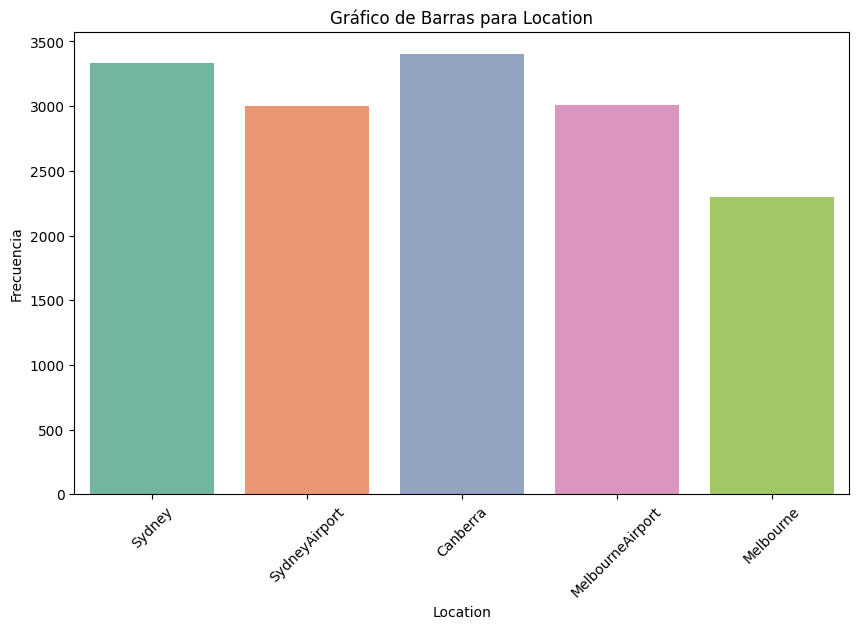

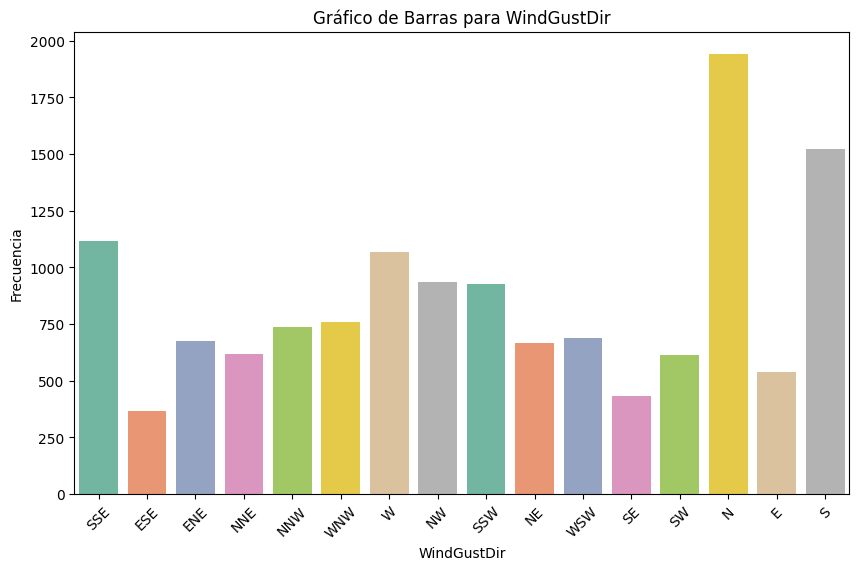

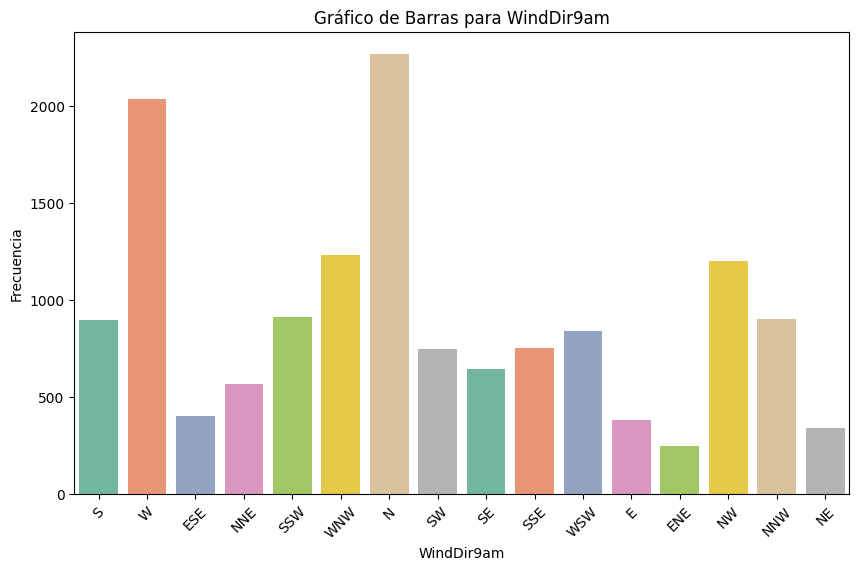

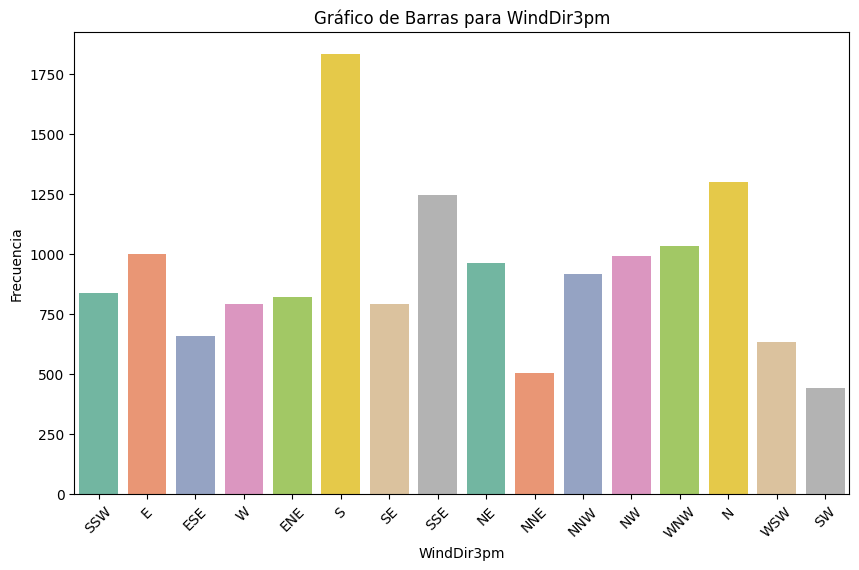

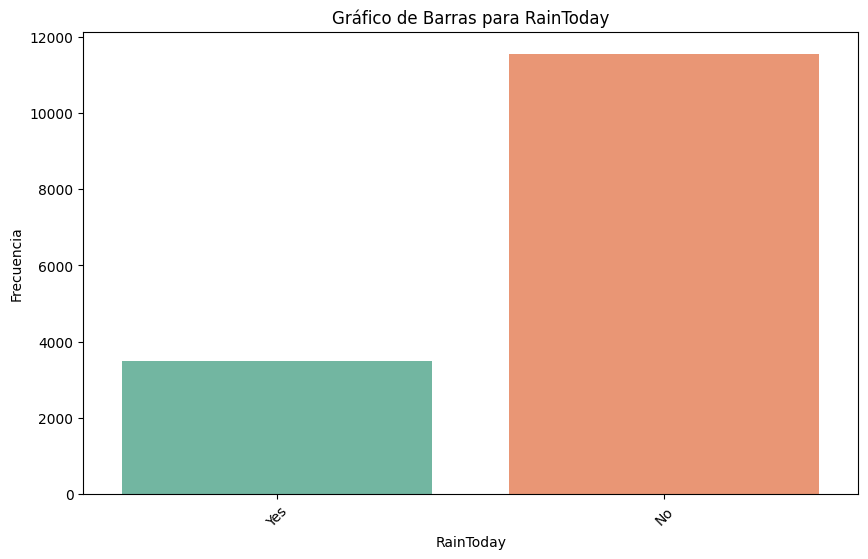

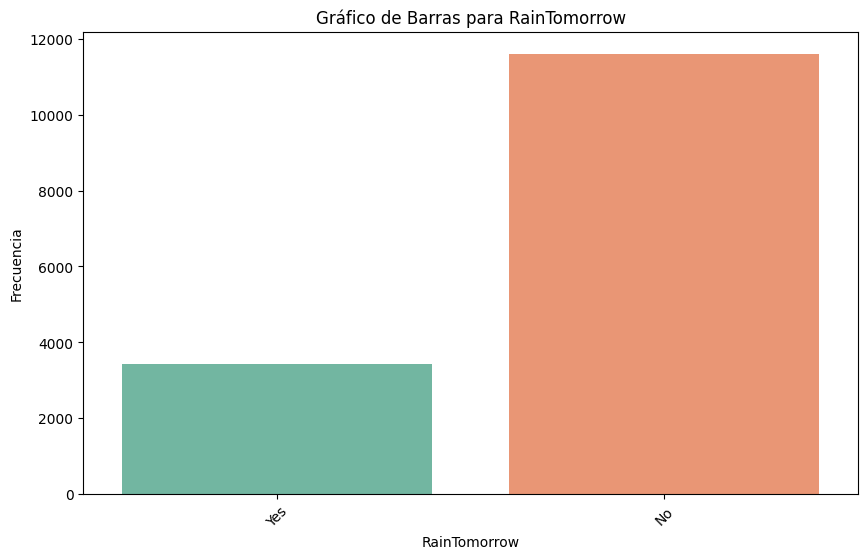

In [26]:
for columna in v_categoricas:
    if columna == 'Date': continue
    plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
    sns.countplot(data=df, x=columna, palette='Set2')  # Utiliza 'countplot' de Seaborn
    plt.title(f'Gráfico de Barras para {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  # Rota las etiquetas del eje x si es necesario
    plt.show()

Detectamos que el dataset esta desbalanceado en cuanto a la proporcion de registros de RainTomorrow y por lo tanto de RainfallTomorrow.


### Pair Plots
OBS: se dejan comentados por el tiempo que demoran en correr, se mantienen la salida

In [27]:
#sns.set(style="ticks")
#sns.pairplot(df, diag_kind="hist", corner=True, hue="RainTomorrow")
#plt.show()

<ipython-input-28-fc4b4c4b3652>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



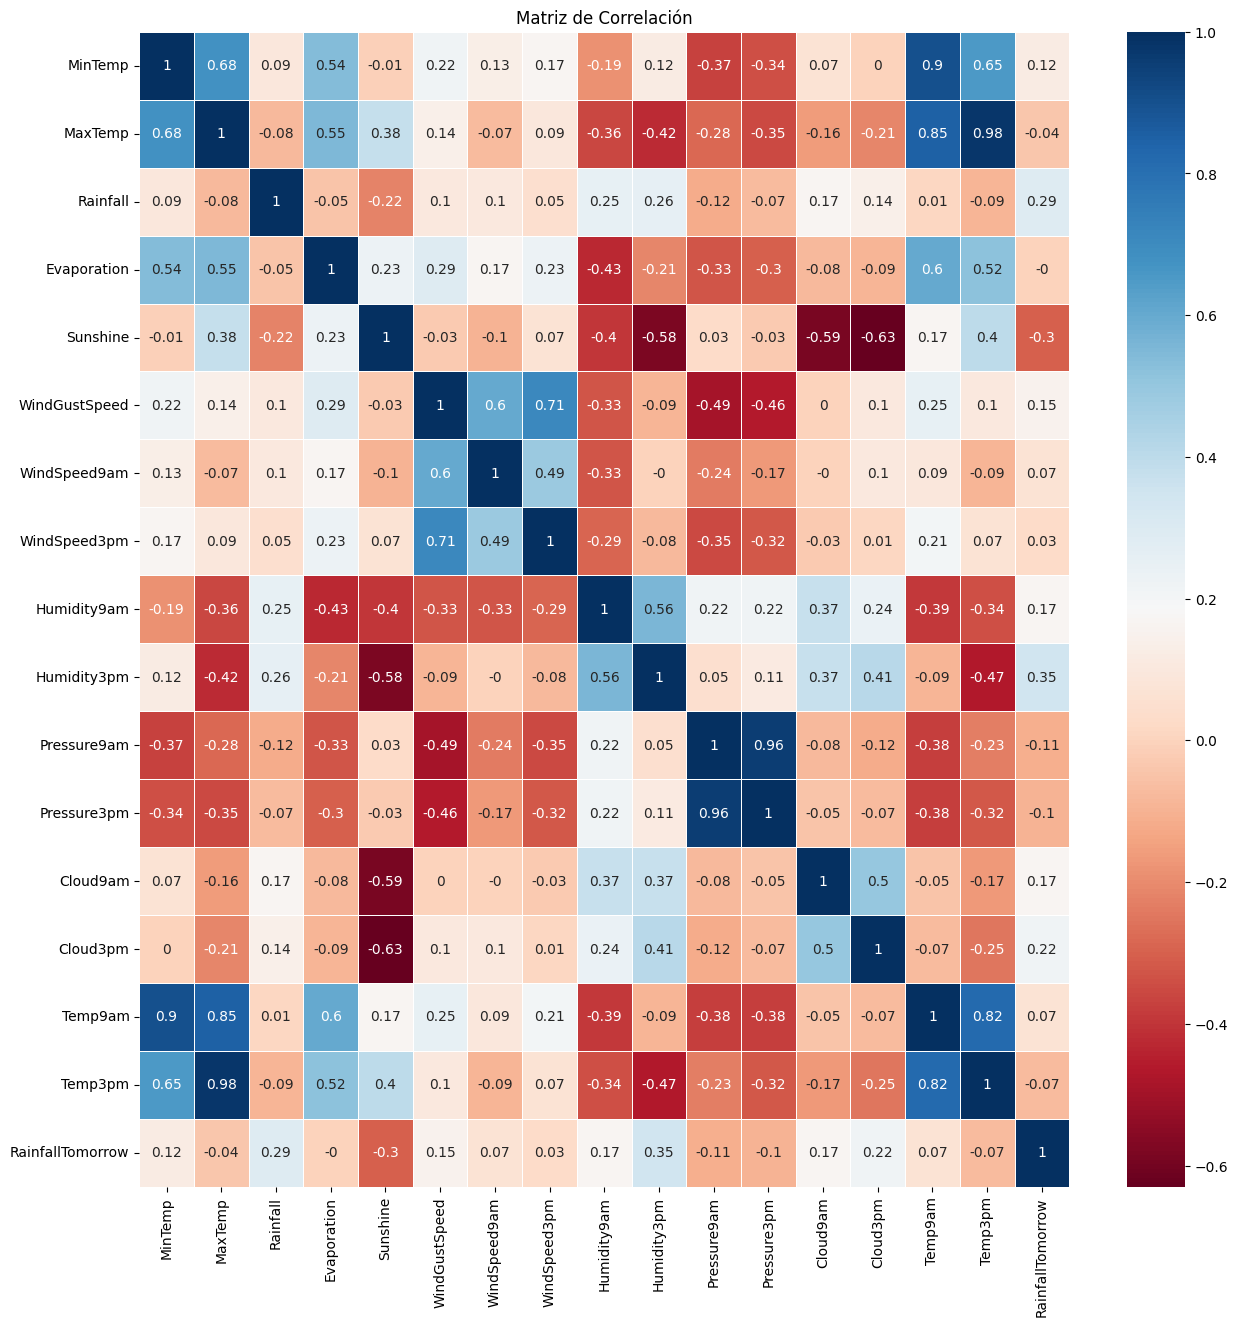

In [28]:
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Redondea los valores de la matriz a dos decimales
correlation_matrix = correlation_matrix.round(2)

# Crea una visualización de la matriz de correlación utilizando Seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

De la matriz de correlacion  de las variables numericas observamos que para nuestra variable a predecir (RainfallTomorrow) no son fuertes las relaciones lineales con las demas variables, siendo el valor mas alto el de 0.35 con Humidity3pm

# Estandarizacion

In [29]:
columnas_numericas = df.select_dtypes(include=[np.number])
columnas_numericas.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainfallTomorrow'],
      dtype='object')

In [30]:
col_num = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainfallTomorrow']
# Crea un objeto StandardScaler
df_std = df.copy()
scaler = StandardScaler()
scaler.fit(df_std[col_num])
# Aplica la estandarización a las columnas seleccionadas
df_std[col_num] = scaler.fit_transform(df_std[col_num])
df_std.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  1.503600e+04  1.503600e+04  1.503600e+04  1.503600e+04  1.503600e+04   
mean   1.209756e-16 -5.746342e-16  7.560976e-18  7.560976e-17 -1.134146e-16   
std    1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00   
min   -3.332292e+00 -2.922803e+00 -3.105734e-01 -1.632500e+00 -1.957332e+00   
25%   -6.306723e-01 -7.600374e-01 -3.105734e-01 -6.692362e-01 -7.076669e-01   
50%   -1.993395e-03 -8.314124e-02 -3.105734e-01 -2.564087e-01  2.642946e-01   
75%    7.286334e-01  6.597936e-01 -2.025291e-01  5.692462e-01  7.363902e-01   
max    3.209366e+00  4.126823e+00  1.581504e+01  6.555244e+00  1.902744e+00   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   1.503600e+04  1.503600e+04  1.503600e+04  1.503600e+04  1.503600e+04   
mean   -1.890244e-17 -1.436585e-16  7.939025e-17 -4.385366e-16  1.587805e-16   
std     1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00   
min    -2.310986e+00 -1.591532e+00 -2.294257e+00 -3.708602e+00 -2.720223e+00   
25%    -6.280270e-01 -7.126865e-01 -7.074013e-01 -6.340377e-01 -6.900921e-01   
50%    -2.072872e-01 -1.267897e-01 -1.784492e-01  7.054992e-02 -1.338179e-02   
75%     5.640691e-01  5.567565e-01  6.678741e-01  7.110841e-01  6.069360e-01   
max     5.472700e+00  5.146281e+00  5.745814e+00  1.992152e+00  2.749852e+00   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  1.503600e+04  1.503600e+04  1.503600e+04  1.503600e+04  1.503600e+04   
mean   5.670732e-15  3.282881e-15  9.073171e-17 -7.560976e-17  4.990244e-16   
std    1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00   
min   -4.312413e+00 -4.243568e+00 -1.883909e+00 -1.970358e+00 -3.031946e+00   
25%   -6.468783e-01 -6.631325e-01 -1.111482e+00 -7.280262e-01 -7.157637e-01   
50%    3.444784e-02  2.995086e-03  4.333731e-01  1.001952e-01 -1.552247e-02   
75%    6.612679e-01  6.691227e-01  8.195868e-01  9.284166e-01  7.206286e-01   
max    3.032283e+00  3.028325e+00  1.592014e+00  1.342527e+00  3.880692e+00   

            Temp3pm  RainfallTomorrow  
count  1.503600e+04      1.503600e+04  
mean   2.721951e-16      4.536586e-17  
std    1.000033e+00      1.000033e+00  
min   -2.829236e+00     -3.074595e-01  
25%   -7.299794e-01     -3.074595e-01  
50%   -8.142866e-02     -3.074595e-01  
75%    6.695248e-01     -1.981509e-01  
max    4.407225e+00      1.600685e+01

### Codificamos Rainfall tomorrow y today como binaria y las direcciones de viento con one hot

In [31]:
df_codificado=df_std.copy()

In [32]:
# df_sub = df.drop(['label'], axis=1) # Dropear las categoricas o encodearlas
#df_std = (df_sub-df_sub.mean())/df_sub.std() # Estandarizar

In [33]:
#One hot
#df_codificado = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])
#GENERA DEMASIADASS COLUMNAS Y POCA INFO(probamos matriz de correlacion para fundamentar esto)
df_codificado = df_std.copy()
#Binaria
df_codificado['RainToday'] = df_codificado['RainToday'].map({'No': 0, 'Yes': 1})
df_codificado['RainTomorrow'] = df_codificado['RainTomorrow'].map({'No': 0, 'Yes': 1})

df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15036 entries, 30167 to 70370
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              15036 non-null  object 
 1   Location          15036 non-null  object 
 2   MinTemp           15036 non-null  float64
 3   MaxTemp           15036 non-null  float64
 4   Rainfall          15036 non-null  float64
 5   Evaporation       15036 non-null  float64
 6   Sunshine          15036 non-null  float64
 7   WindGustDir       13600 non-null  object 
 8   WindGustSpeed     15036 non-null  float64
 9   WindDir9am        14364 non-null  object 
 10  WindDir3pm        14748 non-null  object 
 11  WindSpeed9am      15036 non-null  float64
 12  WindSpeed3pm      15036 non-null  float64
 13  Humidity9am       15036 non-null  float64
 14  Humidity3pm       15036 non-null  float64
 15  Pressure9am       15036 non-null  float64
 16  Pressure3pm       15036 non-null  fl

# Actividad 3


3. Implementar la solución del problema de regresión con regresión lineal múltiple.
- Probar con el método LinearRegression.
- Probar con métodos de gradiente descendiente.
- Probar con métodos de regularización (Lasso, Ridge, Elasticnet).
- Obtener las métricas adecuadas (entre R2 Score, MSE, RMSE, MAE,
MAPE).

Variables a Predecir:
- ‘RainTomorrow’  
- ‘RainfallTomorrow’

Los codigos que hay que adaptar estan en la carpeta de regresion lineal

OBS: Se convirtio el campo Date en Año,Mes,Dia y Dia de la Semana pero se opto por no incluirlo en esta entrega. Se deja el codigo por si resulta util mas adelante

In [34]:
# Convertir la columna 'Date' a tipo datetime
#df_codificado['Date'] = pd.to_datetime(df_codificado['Date'])

# Extraer características de la fecha
#df_codificado['Year'] = df_codificado['Date'].dt.year
#df_codificado['Month'] = df_codificado['Date'].dt.month
# df_codificado['Day'] = df_codificado['Date'].dt.day
#df_codificado['DayOfWeek'] = df_codificado['Date'].dt.dayofweek  # 0: Lunes, 1: Martes, ..., 6: Domingo

# Ahora, puedes utilizar estas características en tu modelo de regresión
# por ejemplo, como parte de las variables independientes (X).


In [35]:
df_codificado.drop(['Date'], axis=1, inplace=True)


In [36]:
#df_codificado.columns


In [37]:
#df_codificado.info()

# Modelo por ciudad o general

In [38]:
#GENERAL
#df_codificado = df_codificado.copy()
#df_codificado_general = (df_codificado1-df_codificado1.mean())/df_codificado1.std() # Estandarizar
df_codificado_general = df_codificado.copy()

df_codificado_general.drop(['Location', 'WindDir9am', 'WindDir3pm','WindGustDir'], axis=1, inplace=True)

In [39]:
df_codificado_general.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

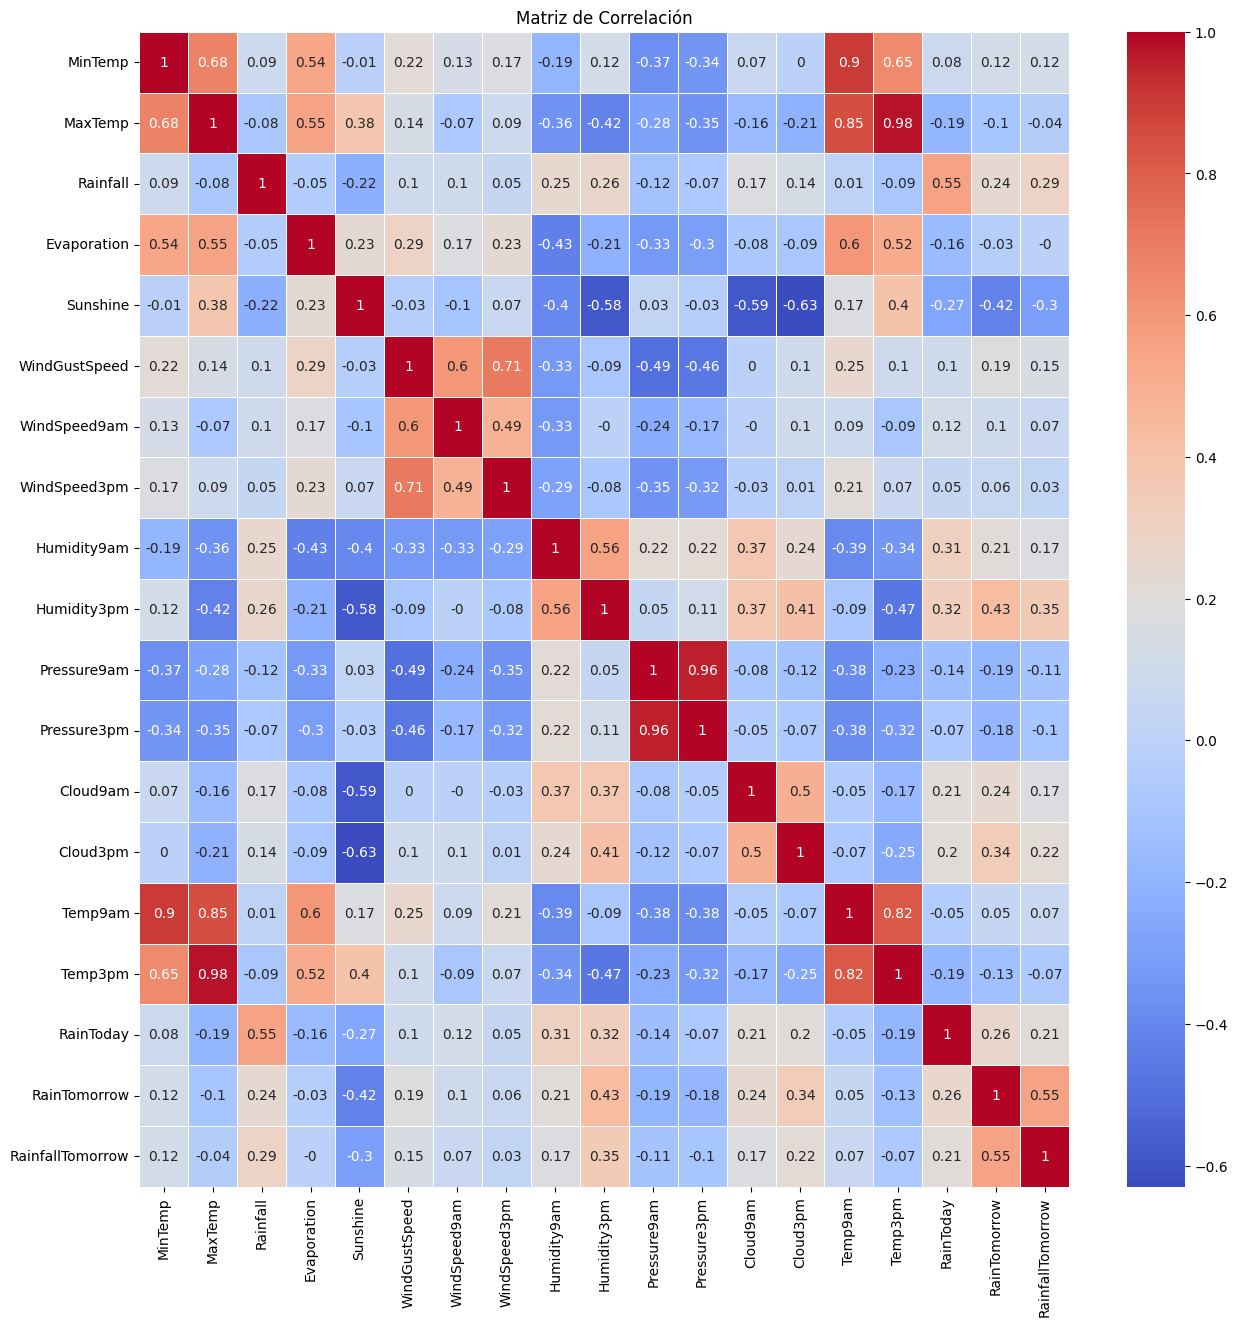

In [40]:
correlation_matrix2 = df_codificado_general.corr()

# Redondea los valores de la matriz a dos decimales
correlation_matrix2 = correlation_matrix2.round(2)

# Crea una visualización de la matriz de correlación utilizando Seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

# Modelos para Rainfalltomorrow

## Regresion Lineal Multiple

In [41]:

# Seleccionar características (variables independientes)
# Aquí, selecciona todas las columnas excepto 'RainTomorrow' y 'RainfallTomorrow'
features = df_codificado_general.drop(['RainfallTomorrow'] , axis=1)

# Variables objetivo
target_rain_tomorrow = df_codificado_general['RainTomorrow']
target_rainfall_tomorrow = df_codificado_general['RainfallTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    features, target_rainfall_tomorrow, test_size=0.2, random_state=42)

# Modelo de regresión lineal para 'RainfallTomorrow'
lr_rainfall_tomorrow = LinearRegression()
lr_rainfall_tomorrow.fit(X_train, y_train)
y_pred_rainfall_tomorrow = lr_rainfall_tomorrow.predict(X_test)

# Evaluar el modelo para 'RainfallTomorrow'
r2_rainfall_tomorrow = r2_score(y_test, y_pred_rainfall_tomorrow)
mse_rainfall_tomorrow = mean_squared_error(y_test, y_pred_rainfall_tomorrow)
rmse_rainfall_tomorrow = mean_squared_error(y_test, y_pred_rainfall_tomorrow, squared=False)
mae_rainfall_tomorrow = mean_absolute_error(y_test, y_pred_rainfall_tomorrow)
mape_rainfall_tomorrow = (mae_rainfall_tomorrow / np.mean(y_test)) * 100

r2_rainfall_tomorrow_Train = r2_score(y_train,lr_rainfall_tomorrow.predict(X_train))
# Imprimir métricas para 'RainfallTomorrow'
print("\nMétricas para RainfallTomorrow:")
print("R2 Score:", r2_rainfall_tomorrow.round(4))
print("Mean Squared Error:", mse_rainfall_tomorrow.round(4))
print("Root Mean Squared Error:", rmse_rainfall_tomorrow.round(4))
print("Mean Absolute Error:", mae_rainfall_tomorrow.round(4))
print("MAPE:", mape_rainfall_tomorrow.round(4))
print('R² adj: ',(1-((1-lr_rainfall_tomorrow.score(X_test, y_test))*((len(X_test)-1)))/(len(X_test)-(len(X_test.columns)-1))).round(4))#Como se comparan modelos con distinta cantidad de features tambien incluimos R2 ajustado
print("R2 Score Train:", r2_rainfall_tomorrow_Train.round(4))


Métricas para RainfallTomorrow:
R2 Score: 0.3377
Mean Squared Error: 0.8477
Root Mean Squared Error: 0.9207
Mean Absolute Error: 0.3567
MAPE: 837.0193
R² adj:  0.3342
R2 Score Train: 0.3553


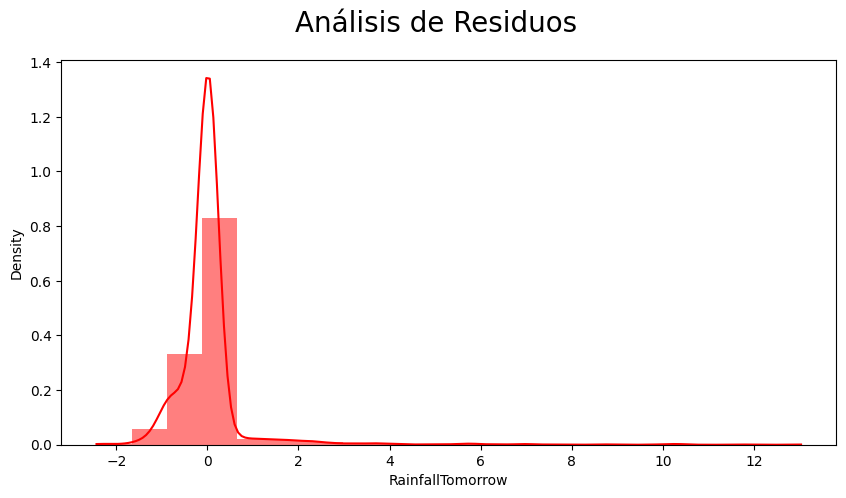

In [42]:
fig = plt.figure(figsize=(10,5))

sns.histplot((y_test - y_pred_rainfall_tomorrow), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)
plt.show()

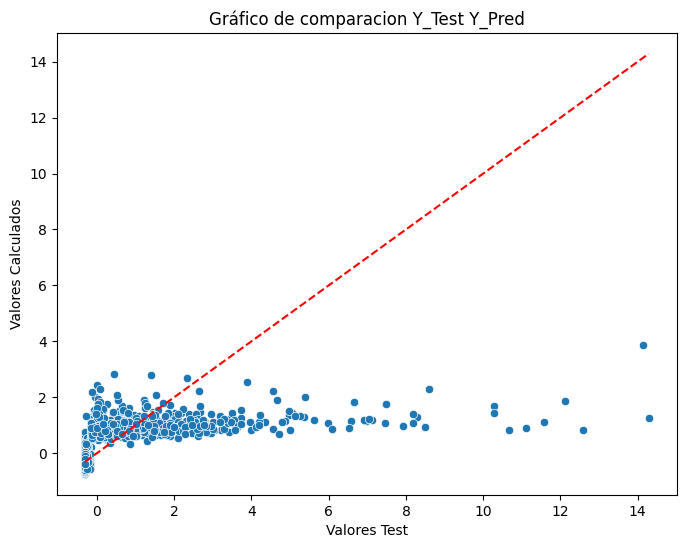

In [43]:
residuos = y_test -y_pred_rainfall_tomorrow

# Crea un gráfico de dispersión de residuos utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rainfall_tomorrow)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea diagonal de referencia
plt.title('Gráfico de comparacion Y_Test Y_Pred')
plt.xlabel('Valores Test')
plt.ylabel('Valores Calculados')
plt.show()

## Descenso por Gradiente

In [44]:

features = df_codificado_general.drop(['RainfallTomorrow'] , axis=1)

# Variables objetivo
target_rain_tomorrow = df_codificado_general['RainTomorrow']
target_rainfall_tomorrow = df_codificado_general['RainfallTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    features, target_rainfall_tomorrow, test_size=0.2, random_state=42)


# Crear un modelo de regresión lineal con SGD
model_sgd = SGDRegressor()

# Entrenar el modelo en el conjunto de entrenamiento
model_sgd.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_sgd = model_sgd.predict(X_test)

# Evaluar el modelo
r2_sgd_rainfall_tomorrow = r2_score(y_test, y_pred_sgd)
mse_sgd_rainfall_tomorrow = mean_squared_error(y_test, y_pred_sgd)
rmse_sgd_rainfall_tomorrow = mean_squared_error(y_test, y_pred_sgd, squared=False)
mae_sgd_rainfall_tomorrow = mean_absolute_error(y_test, y_pred_sgd)

r2_sgd_rainfall_tomorrow_train = r2_score(y_train,model_sgd.predict(X_train))

# Imprimir métricas para 'RainfallTomorrow'
print("\nMétricas para RainfallTomorrow:")
print("R2 Score:", r2_sgd_rainfall_tomorrow.round(4))
print("Mean Squared Error:", mse_sgd_rainfall_tomorrow.round(4))
print("Root Mean Squared Error:", rmse_sgd_rainfall_tomorrow.round(4))
print("Mean Absolute Error:", mae_sgd_rainfall_tomorrow.round(4))
print('R² adj: ',(1-((1-model_sgd.score(X_test, y_test))*((len(X_test)-1)))/(len(X_test)-(len(X_test.columns)-1))).round(4))
print("R2 Score Train:", r2_sgd_rainfall_tomorrow_train.round(4))


Métricas para RainfallTomorrow:
R2 Score: 0.3401
Mean Squared Error: 0.8447
Root Mean Squared Error: 0.9191
Mean Absolute Error: 0.3898
R² adj:  0.3365
R2 Score Train: 0.3489


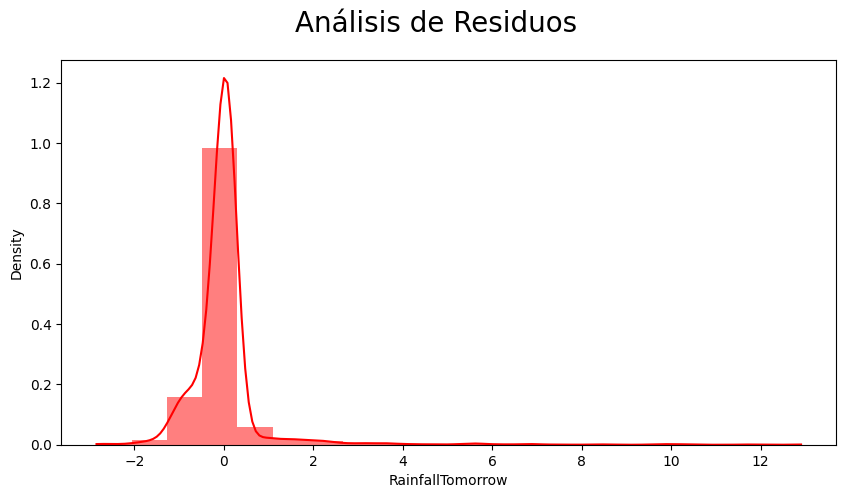

In [45]:
fig = plt.figure(figsize=(10,5))

sns.histplot((y_test - y_pred_sgd), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)
plt.show()

## Ridge, Lasso y ElasticNet

In [46]:
features = df_codificado_general.drop(['RainfallTomorrow'] , axis=1)
#cols =['RainTomorrow','Humidity3pm','MaxTemp','Evaporation','RainToday','Sunshine','WindGustSpeed']
#features = df_codificado_general[cols]
# Variables objetivo
target_rain_tomorrow = df_codificado_general['RainTomorrow']
target_rainfall_tomorrow = df_codificado_general['RainfallTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    features, target_rainfall_tomorrow, test_size=0.2, random_state=42)

lr = LinearRegression()
lasso = Lasso(alpha=0.01) # alpha controla la fuerza de la regularización L1 (Lasso)
ridge = Ridge(alpha=0.01)  # alpha controla la fuerza de la regularización L2 (Ridge)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Ajustar modelos a los datos
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elasticnet.fit(X_train,y_train)

# Mostrar coeficientes
print("Coeficientes del modelo de regresión lineal:")
print(lr.coef_)
print(lr.score(X_train,y_train).round(4))

print("\nCoeficientes del modelo Lasso:")
print(lasso.coef_)
print(lasso.score(X_train,y_train).round(4))


print("\nCoeficientes del modelo Ridge:")
print(ridge.coef_)
print(ridge.score(X_train,y_train).round(4))


print("\nCoeficientes del modelo ElasticNet:")
print(elasticnet.coef_)
print(elasticnet.score(X_train,y_train).round(4))

Coeficientes del modelo de regresión lineal:
[-0.04504412  0.02554667  0.16208855  0.01132288 -0.05740263  0.11277492
 -0.013845   -0.04983321 -0.02680966  0.19168064  0.17686562 -0.14915288
 -0.01196569 -0.01935736  0.0037673   0.07356477 -0.05133325  0.99213628]
0.3553

Coeficientes del modelo Lasso:
[-0.          0.04127509  0.13767155  0.         -0.02852986  0.06854791
 -0.00156312 -0.02244467 -0.          0.13909328  0.0150796  -0.
 -0.         -0.          0.          0.02057384 -0.          0.95844241]
0.3491

Coeficientes del modelo Ridge:
[-0.04504447  0.02554786  0.16208844  0.01132271 -0.05740326  0.11277515
 -0.01384511 -0.04983321 -0.02680928  0.1916809   0.17686219 -0.14914987
 -0.01196586 -0.01935716  0.00376764  0.07356391 -0.05133271  0.99213006]
0.3553

Coeficientes del modelo ElasticNet:
[ 0.          0.          0.1230528   0.         -0.04192777  0.0396049
  0.         -0.          0.          0.13346356 -0.         -0.
  0.          0.          0.01232112  0.    

In [47]:
features = df_codificado_general.drop(['RainfallTomorrow'] , axis=1)
#cols =['RainTomorrow','Humidity3pm','MaxTemp','Evaporation','RainToday','Sunshine','WindGustSpeed']
#features = df_codificado_general[cols]
# Variables objetivo
target_rain_tomorrow = df_codificado_general['RainTomorrow']
target_rainfall_tomorrow = df_codificado_general['RainfallTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    features, target_rainfall_tomorrow, test_size=0.2, random_state=42)

lassoCV = LassoCV()  # alpha controla la fuerza de la regularización L1 (Lasso)
ridgeCV = RidgeCV()  # alpha controla la fuerza de la regularización L2 (Ridge)
elasticnetCV = ElasticNetCV()

# Ajustar modelos a los datos
lassoCV.fit(X_train, y_train)
ridgeCV.fit(X_train, y_train)
elasticnetCV.fit(X_train,y_train)



y_pred_lasso = lassoCV.predict(X_test)
y_pred_ridge = ridgeCV.predict(X_test)
y_pred_elasticnet = elasticnetCV.predict(X_test)


print("Alphas")
print(lassoCV.alpha_)
print(ridgeCV.alpha_)
print(elasticnetCV.alpha_ )

#Lasso
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso_train = r2_score(y_train,lassoCV.predict(X_train))

# Imprimir métricas para 'RainfallTomorrow'
print("\nMétricas para RainfallTomorrow Lasso:")
print("R2 Score:", r2_lasso.round(4))
print("Mean Squared Error:", mse_lasso.round(4))
print("Root Mean Squared Error:", rmse_lasso.round(4))
print("Mean Absolute Error:", mae_lasso.round(4))
print('R² adj: ',(1-((1-lassoCV.score(X_test, y_test))*((len(X_test)-1)))/(len(X_test)-(len(X_test.columns)-1))).round(4))
print("R2 Score Train:", r2_lasso_train.round(4))


r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge_train = r2_score(y_train,ridgeCV.predict(X_train))

# Imprimir métricas para 'RainfallTomorrow'
print("\nMétricas para RainfallTomorrow Ridge:")
print("R2 Score:", r2_ridge.round(4))
print("Mean Squared Error:", mse_ridge.round(4))
print("Root Mean Squared Error:", rmse_ridge.round(4))
print("Mean Absolute Error:", mae_ridge.round(4))
print('R² adj: ',(1-((1-ridgeCV.score(X_test, y_test))*((len(X_test)-1)))/(len(X_test)-(len(X_test.columns)-1))).round(4))
print("R2 Score Train:", r2_ridge_train.round(4))



r2_elastic = r2_score(y_test, y_pred_elasticnet)
mse_elastic = mean_squared_error(y_test, y_pred_elasticnet)
rmse_elastic = mean_squared_error(y_test, y_pred_elasticnet, squared=False)
mae_elastic = mean_absolute_error(y_test, y_pred_elasticnet)
r2_ridge_elastic = r2_score(y_train,elasticnetCV.predict(X_train))


# Imprimir métricas para 'RainfallTomorrow'
print("\nMétricas para RainfallTomorrow ElasticNet:")
print("R2 Score:", r2_elastic.round(4))
print("Mean Squared Error:", mse_elastic.round(4))
print("Root Mean Squared Error:", rmse_elastic.round(4))
print("Mean Absolute Error:", mae_elastic.round(4))
print('R² adj: ',(1-((1-elasticnetCV.score(X_test, y_test))*((len(X_test)-1)))/(len(X_test)-(len(X_test.columns)-1))).round(4))
print("R2 Score Train:", r2_ridge_elastic.round(4))



# Mostrar coeficientes

print("\nCoeficientes del modelo Lasso:")
print(f"Coeficientes: {lassoCV.coef_}")
print(f"Score:  {lassoCV.score(X_train,y_train).round(4)}")


print("\nCoeficientes del modelo Ridge:")
print(f"Coeficientes:{ridgeCV.coef_}")
print(f"Score:  {ridgeCV.score(X_train,y_train).round(4)}")


print("\nCoeficientes del modelo ElasticNet:")
print(f"Coeficientes:{elasticnetCV.coef_}")
print(f"Score: {elasticnetCV.score(X_train,y_train).round(4)}")



Alphas
0.00033821990357260786
10.0
0.0006764398071452152

Métricas para RainfallTomorrow Lasso:
R2 Score: 0.3375
Mean Squared Error: 0.848
Root Mean Squared Error: 0.9209
Mean Absolute Error: 0.356
R² adj:  0.3339
R2 Score Train: 0.3553

Métricas para RainfallTomorrow Ridge:
R2 Score: 0.3375
Mean Squared Error: 0.8479
Root Mean Squared Error: 0.9208
Mean Absolute Error: 0.3565
R² adj:  0.334
R2 Score Train: 0.3553

Métricas para RainfallTomorrow ElasticNet:
R2 Score: 0.3374
Mean Squared Error: 0.8481
Root Mean Squared Error: 0.9209
Mean Absolute Error: 0.3559
R² adj:  0.3339
R2 Score Train: 0.3553

Coeficientes del modelo Lasso:
Coeficientes: [-0.04103888  0.0269569   0.16115969  0.01035859 -0.05605958  0.11146881
 -0.01371537 -0.04871779 -0.02618085  0.18996094  0.16805784 -0.14061112
 -0.01168127 -0.01820087  0.          0.07273008 -0.04984204  0.99131955]
Score:  0.3553

Coeficientes del modelo Ridge:
Coeficientes:[-0.04538104  0.02670279  0.16198236  0.01116343 -0.05802429  0.11300

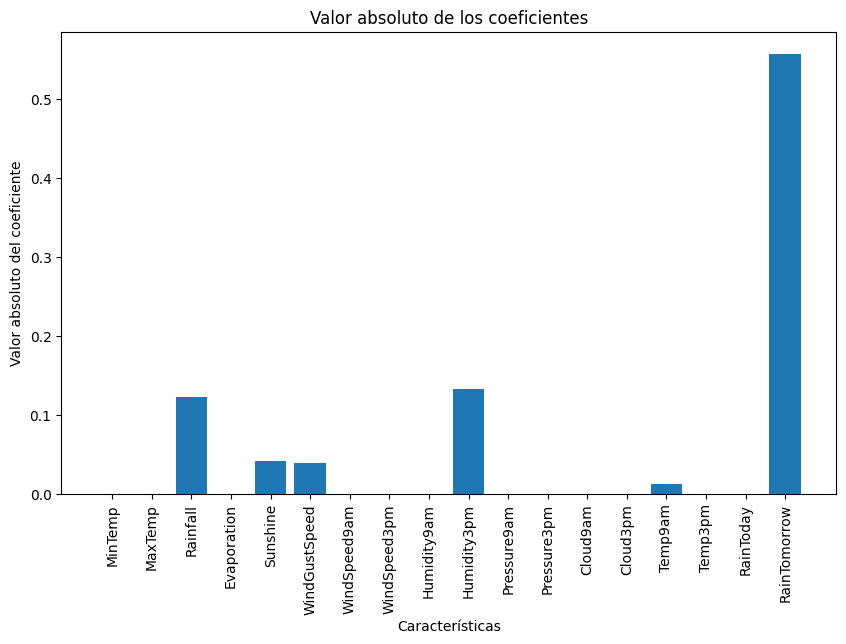

In [48]:
coeficientes = elasticnet.coef_

# Nombres de las características correspondientes
nombres_caracteristicas = features.columns

#gráfico de barras para visualizar los coeficientes
plt.figure(figsize=(10, 6))
plt.bar(range(len(coeficientes)), np.abs(coeficientes))
plt.xticks(range(len(coeficientes)), nombres_caracteristicas, rotation=90)
plt.xlabel("Características")
plt.ylabel("Valor absoluto del coeficiente")
plt.title("Valor absoluto de los coeficientes")
plt.show()

In [49]:
mejores_coef = ['WindGustSpeed','Temp9am', 'Sunshine','Rainfall','RainTomorrow']

In [50]:
#features = df_codificado_general.drop(['RainfallTomorrow'] , axis=1)
#cols =['RainTomorrow','Humidity3pm','MaxTemp','Evaporation','RainToday','Sunshine','WindGustSpeed']
features2 = df_codificado_general[mejores_coef]
# Variables objetivo
target_rain_tomorrow = df_codificado_general['RainTomorrow']
target_rainfall_tomorrow = df_codificado_general['RainfallTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    features2, target_rainfall_tomorrow, test_size=0.2, random_state=42)

lassoCV = LassoCV()  # alpha controla la fuerza de la regularización L1 (Lasso)
ridgeCV = RidgeCV()  # alpha controla la fuerza de la regularización L2 (Ridge)
elasticnetCV = ElasticNetCV()

# Ajustar modelos a los datos
lassoCV.fit(X_train, y_train)
ridgeCV.fit(X_train, y_train)
elasticnetCV.fit(X_train,y_train)

print("Alphas")
print(lassoCV.alpha_)
print(ridgeCV.alpha_)
print(elasticnetCV.alpha_ )

# Mostrar coeficientes

print("\nCoeficientes del modelo Lasso:")
print(f"Coeficientes: {lassoCV.coef_}")
print(f"Score:  {lassoCV.score(X_train,y_train).round(4)}")


print("\nCoeficientes del modelo Ridge:")
print(f"Coeficientes:{ridgeCV.coef_}")
print(f"Score:  {ridgeCV.score(X_train,y_train).round(4)}")


print("\nCoeficientes del modelo ElasticNet:")
print(f"Coeficientes:{elasticnetCV.coef_}")
print(f"Score: {elasticnetCV.score(X_train,y_train).round(4)}")


Alphas
0.00029265972199802226
1.0
0.0005853194439960446

Coeficientes del modelo Lasso:
Coeficientes: [ 0.0242555   0.05034806 -0.08074664  0.15625368  1.07985943]
Score:  0.3373

Coeficientes del modelo Ridge:
Coeficientes:[ 0.02439668  0.05061774 -0.08090111  0.15640872  1.08068487]
Score:  0.3373

Coeficientes del modelo ElasticNet:
Coeficientes:[ 0.02440037  0.0504007  -0.08109878  0.15633606  1.07759863]
Score: 0.3373


In [51]:
metricas_modelo_regresion_lineal = {
    'r2': 0.3377,
    'r2ajustado':0.3342,
    'mse': 0.8477,
    'rmse':  0.9207,
    'mae':0.3567,
    'r2_train': 0.3553

}

metricas_modelo_descenso_gradiente = {
    'r2': 0.3337,
    'r2ajustado': 0.3302,
    'mse': 0.8527,
    'rmse': 0.9234,
    'mae': 0.3449,
    'r2_train': 0.353
}

metricas_modelo_lasso = {
    'r2': 0.3375,
    'r2ajustado':  0.3339,
    'mse': 0.848,
    'rmse': 0.9209,
    'mae': 0.356,
    'r2_train': 0.3553
}

metricas_modelo_elasticnet = {
    'r2': 0.3374,
    'r2ajustado':0.3339,
    'mse': 0.8481,
    'rmse':  0.9209,
    'mae':0.3559,
    'r2_train':  0.3553
}

metricas_modelo_ridge = {
    'r2':.3375,
    'r2ajustado':  0.334,
    'mse': 0.8479,
    'rmse': 0.9208,
    'mae':  0.3565,
    'r2_train': 0.3553
}



data = {
    'Modelo': ['Regresión Lineal', 'Descenso Gradiente', 'Lasso', 'Ridge', 'ElasticNet'],
    'R2': [metricas_modelo_regresion_lineal['r2'], metricas_modelo_descenso_gradiente['r2'],
           metricas_modelo_lasso['r2'], metricas_modelo_ridge['r2'], metricas_modelo_elasticnet['r2']],
    'R2 Ajustado': [metricas_modelo_regresion_lineal['r2ajustado'], metricas_modelo_descenso_gradiente['r2ajustado'],
                    metricas_modelo_lasso['r2ajustado'], metricas_modelo_ridge['r2ajustado'], metricas_modelo_elasticnet['r2ajustado']],
    'MSE': [metricas_modelo_regresion_lineal['mse'], metricas_modelo_descenso_gradiente['mse'],
            metricas_modelo_lasso['mse'], metricas_modelo_ridge['mse'], metricas_modelo_elasticnet['mse']],
    'RMSE': [metricas_modelo_regresion_lineal['rmse'], metricas_modelo_descenso_gradiente['rmse'],
             metricas_modelo_lasso['rmse'], metricas_modelo_ridge['rmse'], metricas_modelo_elasticnet['rmse']],
    'MAE': [metricas_modelo_regresion_lineal['mae'], metricas_modelo_descenso_gradiente['mae'],
            metricas_modelo_lasso['mae'], metricas_modelo_ridge['mae'], metricas_modelo_elasticnet['mae']],
    'R2 Train': [metricas_modelo_regresion_lineal['r2_train'], metricas_modelo_descenso_gradiente['r2_train'],
                metricas_modelo_lasso['r2_train'], metricas_modelo_ridge['r2_train'], metricas_modelo_elasticnet['r2_train']]
}

df_metricas = pd.DataFrame(data)


#print(df_metricas)
df_metricas.columns

Index(['Modelo', 'R2', 'R2 Ajustado', 'MSE', 'RMSE', 'MAE', 'R2 Train'], dtype='object')

In [52]:
import plotly.graph_objects as go
metricas = ['R2', 'R2 Ajustado', 'MSE', 'RMSE', 'MAE', 'R2 Train']

fig = go.Figure()

for metrica in metricas:
    fig.add_trace(go.Bar(x=df_metricas['Modelo'], y=df_metricas[metrica], name=metrica))


fig.update_layout(barmode='group', title='Comparación de Métricas entre Modelos')
fig.show()

Con esta ultima grafica comprobamos que los modelos se aproximan a valores muy similares

Dada la baja explicabilidad del modelo buscamos mejorarlo mediante la eliminacion de outliers

### Sin outliers

In [53]:
col_num = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']

In [54]:
df_sin_outliers = df.copy()
# Calcula el IQR para cada columna numérica
Q1 = df_sin_outliers.quantile(0.25)
Q3 = df_sin_outliers.quantile(0.75)
IQR = Q3 - Q1

# Define un umbral para considerar los outliers
umbral = 1.5

for col in col_num:
    filtro_outliers = ~((df_sin_outliers[col] < (Q1[col] - umbral * IQR[col])) | (df_sin_outliers[col] > (Q3[col] + umbral * IQR[col])))
    df_sin_outliers = df_sin_outliers[filtro_outliers]

<ipython-input-54-463b57bd7c66>:3: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-54-463b57bd7c66>:4: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [55]:
# Crea un objeto StandardScaler
scaler = StandardScaler()
scaler.fit(df_sin_outliers[col_num])
# Aplica la estandarización a las columnas seleccionadas
df_sin_outliers[col_num] = scaler.fit_transform(df_sin_outliers[col_num])
df_sin_outliers.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  1.107700e+04  1.107700e+04  1.107700e+04  1.107700e+04  1.107700e+04   
mean   5.131662e-17  4.823762e-16  7.184327e-17 -1.590815e-16  2.668464e-16   
std    1.000045e+00  1.000045e+00  1.000045e+00  1.000045e+00  1.000045e+00   
min   -2.624309e+00 -2.588702e+00 -4.019950e-01 -1.848720e+00 -2.173674e+00   
25%   -6.363811e-01 -7.739877e-01 -4.019950e-01 -7.217932e-01 -5.769202e-01   
50%   -1.943786e-02 -5.857140e-02 -4.019950e-01 -2.388246e-01  1.488773e-01   
75%    7.174665e-01  7.091925e-01 -4.019950e-01  6.466178e-01  7.295152e-01   
max    2.568296e+00  2.907789e+00  4.543472e+00  2.900471e+00  1.861759e+00   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   1.107700e+04  1.107700e+04  1.107700e+04  1.107700e+04  1.107700e+04   
mean   -1.154624e-16 -7.184327e-17 -7.440910e-17 -8.210659e-17  7.184327e-17   
std     1.000045e+00  1.000045e+00  1.000045e+00  1.000045e+00  1.000045e+00   
min    -2.565393e+00 -1.724537e+00 -2.420209e+00 -2.844164e+00 -2.701507e+00   
25%    -7.050587e-01 -6.605704e-01 -6.563579e-01 -6.370628e-01 -7.100813e-01   
50%    -2.857366e-02 -1.876961e-01 -6.840755e-02  7.490546e-02 -2.552879e-02   
75%     5.633508e-01  6.398338e-01  6.371328e-01  7.156769e-01  6.590237e-01   
max     2.931049e+00  3.122424e+00  2.988934e+00  2.282007e+00  2.899377e+00   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  1.107700e+04  1.107700e+04  1.107700e+04  1.107700e+04  1.107700e+04   
mean  -2.717215e-15  1.333206e-14  7.184327e-17 -3.078997e-17  6.157994e-17   
std    1.000045e+00  1.000045e+00  1.000045e+00  1.000045e+00  1.000045e+00   
min   -3.029543e+00 -3.021251e+00 -1.767989e+00 -1.848432e+00 -2.934038e+00   
25%   -6.576383e-01 -6.750118e-01 -1.003839e+00 -1.029363e+00 -7.248342e-01   
50%   -1.211996e-02  6.154334e-03  5.244604e-01  1.992399e-01 -1.937423e-02   
75%    6.634225e-01  6.721835e-01  9.065352e-01  1.018309e+00  7.417799e-01   
max    2.735086e+00  2.776230e+00  1.670685e+00  1.427843e+00  2.895289e+00   

            Temp3pm  RainfallTomorrow  
count  1.107700e+04      11077.000000  
mean   4.618496e-16          1.377015  
std    1.000045e+00          5.046938  
min   -2.768677e+00          0.000000  
25%   -7.522368e-01          0.000000  
50%   -5.008335e-02          0.000000  
75%    7.060819e-01          0.200000  
max    2.884558e+00        109.400000

In [56]:
#GENERA DEMASIADASS COLUMNAS Y POCA INFO(probamos matriz de correlacion para fundamentar esto)
#Binaria
df_sin_outliers['RainToday'] = df_sin_outliers['RainToday'].map({'No': 0, 'Yes': 1})
df_sin_outliers['RainTomorrow'] = df_sin_outliers['RainTomorrow'].map({'No': 0, 'Yes': 1})

df_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11077 entries, 30172 to 70370
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              11077 non-null  object 
 1   Location          11077 non-null  object 
 2   MinTemp           11077 non-null  float64
 3   MaxTemp           11077 non-null  float64
 4   Rainfall          11077 non-null  float64
 5   Evaporation       11077 non-null  float64
 6   Sunshine          11077 non-null  float64
 7   WindGustDir       10009 non-null  object 
 8   WindGustSpeed     11077 non-null  float64
 9   WindDir9am        10557 non-null  object 
 10  WindDir3pm        10867 non-null  object 
 11  WindSpeed9am      11077 non-null  float64
 12  WindSpeed3pm      11077 non-null  float64
 13  Humidity9am       11077 non-null  float64
 14  Humidity3pm       11077 non-null  float64
 15  Pressure9am       11077 non-null  float64
 16  Pressure3pm       11077 non-null  fl

Se perdieron demasiados registros y sobre todo donde RainTomorrow es True lo que nos deja menos datos con los que trabajar

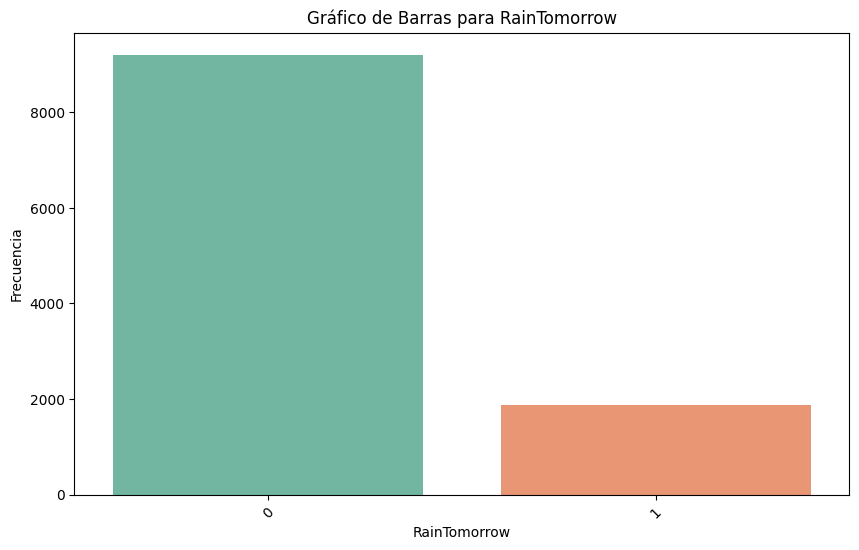

In [57]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
sns.countplot(data=df_sin_outliers, x='RainTomorrow', palette='Set2')  # Utiliza 'countplot' de Seaborn
plt.title(f'Gráfico de Barras para RainTomorrow')
plt.xlabel("RainTomorrow")
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x si es necesario
plt.show()

In [58]:
df_sin_outliers.drop(['Location', 'WindDir9am', 'WindDir3pm','WindGustDir','Date'], axis=1, inplace=True)

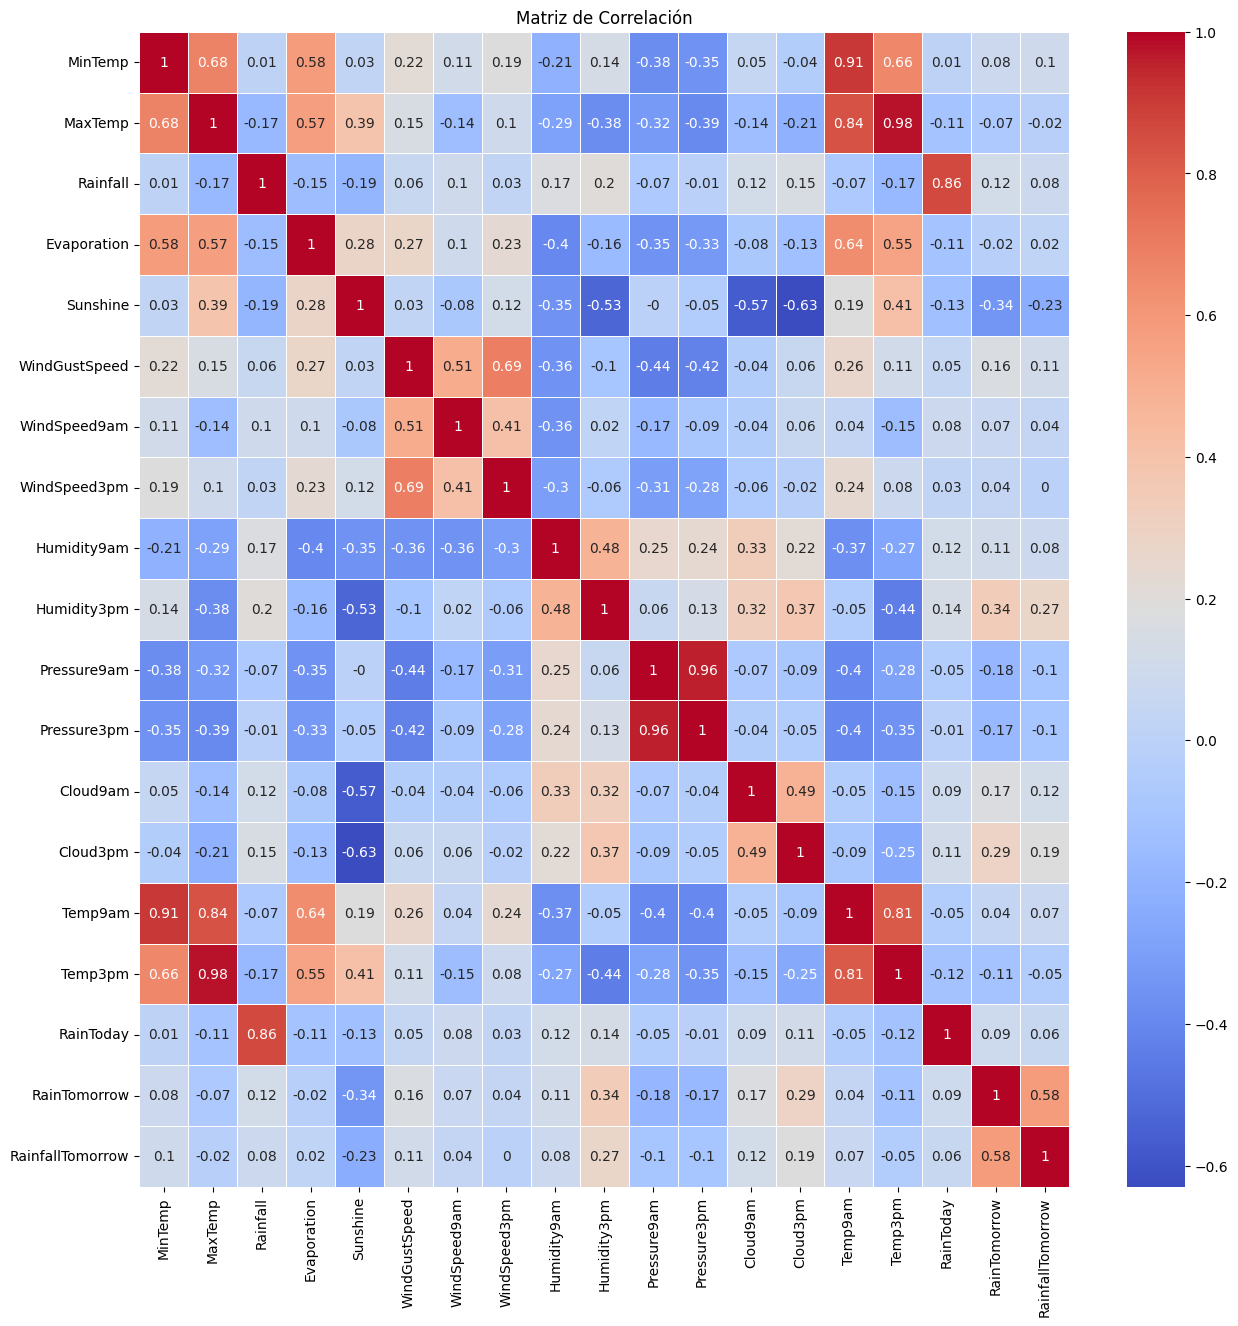

In [59]:
correlation_matrix3 = df_sin_outliers.corr()

# Redondea los valores de la matriz a dos decimales
correlation_matrix3 = correlation_matrix3.round(2)

# Crea una visualización de la matriz de correlación utilizando Seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [60]:
# Seleccionar características (variables independientes)
# Aquí, selecciona todas las columnas excepto 'RainTomorrow' y 'RainfallTomorrow'
features = df_sin_outliers.drop(['RainfallTomorrow'] , axis=1)

# Variables objetivo
target_rain_tomorrow = df_sin_outliers['RainTomorrow']
target_rainfall_tomorrow = df_sin_outliers['RainfallTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    features, target_rainfall_tomorrow, test_size=0.2, random_state=42)

# Modelo de regresión lineal para 'RainfallTomorrow'
lr_rainfall_tomorrow = LinearRegression()
lr_rainfall_tomorrow.fit(X_train, y_train)
y_pred_rainfall_tomorrow = lr_rainfall_tomorrow.predict(X_test)

# Evaluar el modelo para 'RainfallTomorrow'
r2_rainfall_tomorrow = r2_score(y_test, y_pred_rainfall_tomorrow)
mse_rainfall_tomorrow = mean_squared_error(y_test, y_pred_rainfall_tomorrow)
rmse_rainfall_tomorrow = mean_squared_error(y_test, y_pred_rainfall_tomorrow, squared=False)
mae_rainfall_tomorrow = mean_absolute_error(y_test, y_pred_rainfall_tomorrow)
mape_rainfall_tomorrow = (mae_rainfall_tomorrow / np.mean(y_test)) * 100

# Imprimir métricas para 'RainfallTomorrow'
print("\nMétricas para RainfallTomorrow:")
print("R2 Score:", r2_rainfall_tomorrow)
print("Mean Squared Error:", mse_rainfall_tomorrow)
print("Root Mean Squared Error:", rmse_rainfall_tomorrow)
print("Mean Absolute Error:", mae_rainfall_tomorrow)
print("MAPE:", mape_rainfall_tomorrow)


Métricas para RainfallTomorrow:
R2 Score: 0.3114217864827111
Mean Squared Error: 21.878670830172574
Root Mean Squared Error: 4.677464145257831
Mean Absolute Error: 1.4325724023703117
MAPE: 99.81387969352652


In [61]:
# Obtener los coeficientes del modelo de regresión lineal
coeficientes = lr_rainfall_tomorrow.coef_

# Obtener el nombre de las características (columnas)
nombres_caracteristicas = X_train.columns

# Crear un diccionario que asocie cada coeficiente con su nombre de característica
coeficientes_por_caracteristica = dict(zip(nombres_caracteristicas, coeficientes))

# Imprimir los coeficientes junto con los nombres de las características
for caracteristica, coeficiente in coeficientes_por_caracteristica.items():
    print(f"{caracteristica}: {coeficiente}")


MinTemp: -0.13570381146675062
MaxTemp: 0.7394257192439964
Rainfall: 0.18469989610470017
Evaporation: 0.10207966588936865
Sunshine: -0.13969294268243151
WindGustSpeed: 0.42592129837997794
WindSpeed9am: -0.039930894563127886
WindSpeed3pm: -0.32332525961076863
Humidity9am: -0.09848329086963956
Humidity3pm: 0.5953226782918574
Pressure9am: 0.6517463034749709
Pressure3pm: -0.5315361017433246
Cloud9am: 0.0026138497766039514
Cloud3pm: -0.05638087654535033
Temp9am: 0.0571781397606162
Temp3pm: -0.4206602359297098
RainToday: -0.5927388056731115
RainTomorrow: 6.992892250768556


In [62]:
best_features = ['Humidity3pm','MaxTemp','Evaporation','RainToday','Sunshine','WindGustSpeed']

Los modelos no alcanzaron los niveles de competencia esperados, y el tratamiento de los outliers redujo la eficacia aun mas del modelo.